# Imports y variables importantes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.animation as animation


data = np.load('../data/SMP22to95_edge_seq.npy', allow_pickle=True)

ccodes = pd.read_csv('filtros/ccode_reindexed.csv')
pcode_four_digit = pd.read_csv('filtros/pcode_reindexed_four_digit.csv', dtype={'original_code': str})
pcode_descriptions = pd.read_csv('filtros/pcode_reindexed.csv', dtype={'original_code': str})
pcode_descriptions['original_code'] = pcode_descriptions['original_code'].apply(lambda x: x[:4])
años = list(range(1995, 1995 + 28))

In [2]:
def obtain_product_and_country_from_edge(u,v):
    # teniendo en cuenta que v_adj = v - (max_u + 1) y max_u = 136
    original_v =  v + 137
    country = ccodes[ccodes['code'] == u]['country_name'].iloc[0]
    product_code = pcode_four_digit[pcode_four_digit['code'] == original_v]['original_code'].iloc[0]
    product_descriptions = pcode_descriptions[pcode_descriptions['original_code'] == product_code]['description']


    print(f"Pais: {country} \n")

    print(product_code)
    print(product_descriptions)

In [3]:
year = []
for i in range(len(data)):
    weights = [min(w,2) for u, v, w in data[i]]
    year.append(weights)

print(len(year[0]))

97215


In [4]:
filtered_year = []
clamped_year = []
year = []
filtered_to_1_year =[]
for i in range(len(data)):
    weights_filtered = [w for u, v, w in data[i] if w <= 2]
    weights_clamped = [min(w,2) for u, v, w in data[i]]
    weights = [w for u, v, w in data[i]]
    weights_to_1 = [w for u, v, w in data[i] if w <= 2]
    filtered_year.append(weights_filtered)
    clamped_year.append(weights_clamped)
    year.append(weights)
    filtered_to_1_year.append(weights_to_1)

num_years = len(year)

# Histogramas

Distribución de pesos sin filtrar

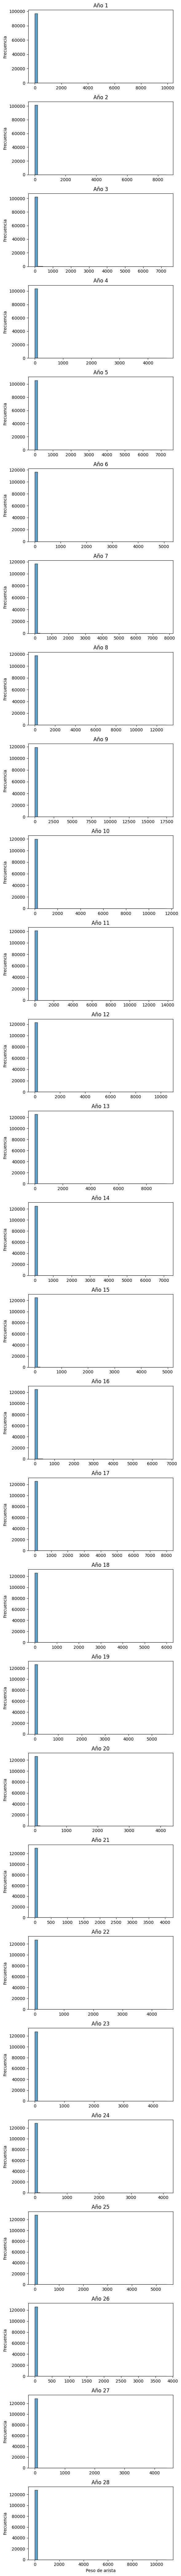

In [7]:
fig, axes = plt.subplots(num_years, 1, figsize=(6, 3 * num_years), sharex=False)

for i in range(num_years):
    axes[i].hist(year[i], bins=50, edgecolor='black', alpha=0.7)
    axes[i].set_title(f"Año {i+1}")
    axes[i].set_ylabel("Frecuencia")

plt.xlabel("Peso de arista")
plt.tight_layout()
plt.show()


Distribución de pesos filtrando los pesos mayores a 2

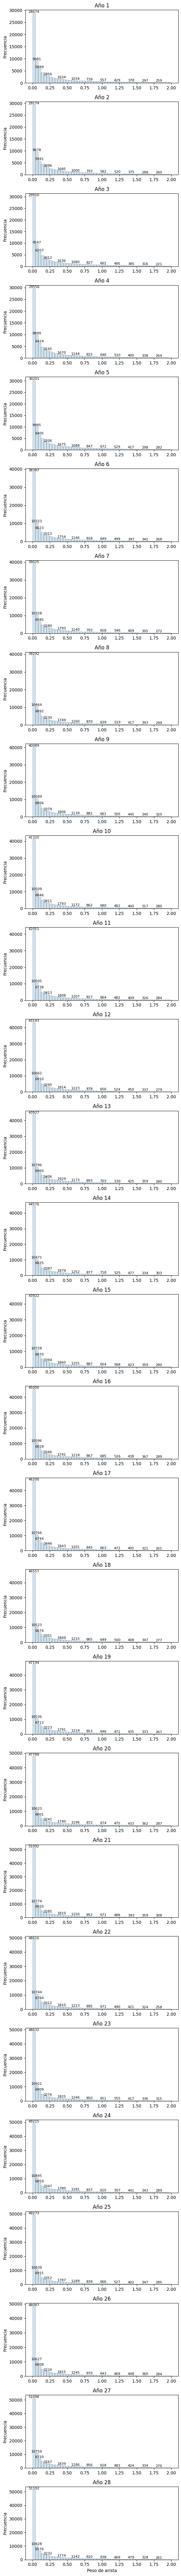

In [8]:

fig, axes = plt.subplots(num_years, 1, figsize=(6, 3 * num_years), sharex=False)

for i in range(num_years):
    counts, bins, patches = axes[i].hist(filtered_year[i], bins=50, edgecolor='black', alpha=0.2)
    axes[i].set_title(f"Año {i+1}")
    axes[i].set_ylabel("Frecuencia")
    
    # Agregar etiquetas cada 10 bins
    for j, (count, bin_edge) in enumerate(zip(counts, bins[:-1])):
        if j < 3 or j % 5 == 0:  # Etiquetar solo cada 10 bins
            axes[i].text(bin_edge + (bins[1] - bins[0]) / 2, count, str(int(count)),
                         ha='center', va='bottom', fontsize=8)

plt.xlabel("Peso de arista")
plt.tight_layout()
plt.show()


Distribución de pesos juntando todos los años y filtrando w>=2

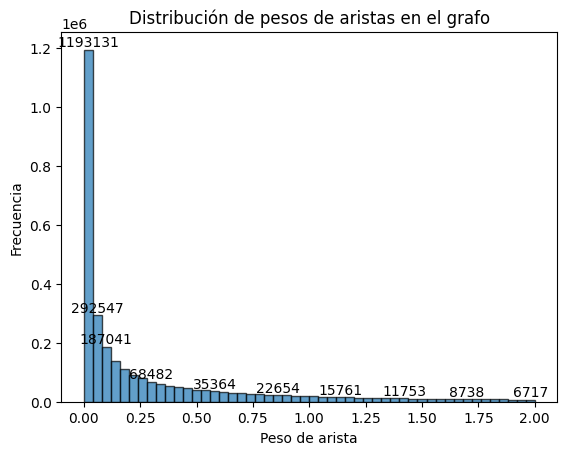

In [9]:
all_weights = np.concatenate(filtered_year)
counts, bins, patches = plt.hist(all_weights, bins=50, edgecolor='black', alpha=0.7)
for i, (count, bin_edge) in enumerate(zip(counts, bins[:-1])):
    if i < 3 or i % 7 == 0:  
        plt.text(bin_edge + (bins[1] - bins[0]) / 2, count, str(int(count)), 
                 ha='center', va='bottom', fontsize=10)
plt.xlabel("Peso de arista")
plt.ylabel("Frecuencia")
plt.title("Distribución de pesos de aristas en el grafo")
plt.show()

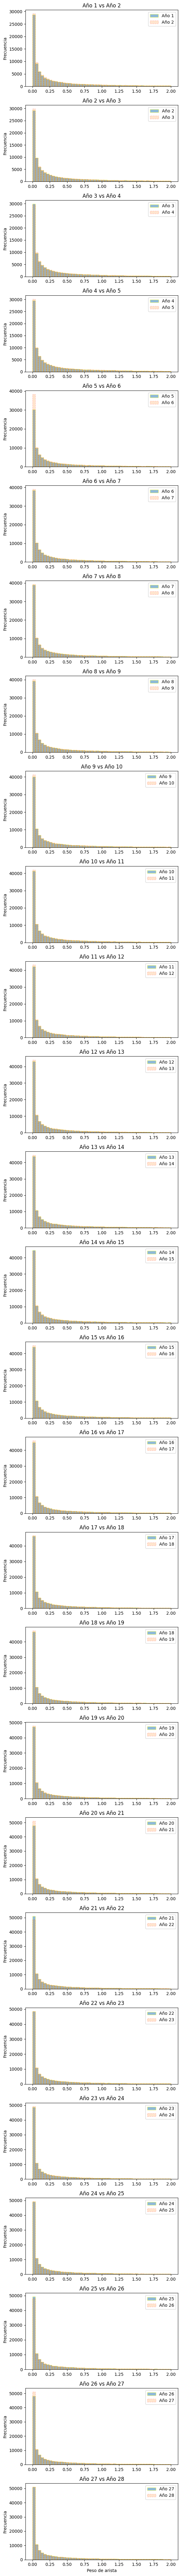

In [21]:

fig, axes = plt.subplots(num_years -1, 1, figsize=(6, 3 * num_years), sharex=False)

for i in range(num_years-1):
    axes[i].hist(filtered_year[i], bins=50,label=f"Año {i+1}",histtype="bar",linestyle='-', edgecolor='yellow', alpha=0.5)
    axes[i].hist(filtered_year[i+1], bins=50, label=f"Año {i+2}",histtype="bar",linestyle='--', edgecolor='red', alpha=0.2)
    axes[i].set_title(f"Año {i+1} vs Año {i+2}")
    axes[i].set_ylabel("Frecuencia")
    axes[i].legend(loc='best') 


#plt.legend()
plt.xlabel("Peso de arista")
plt.tight_layout()
plt.show()

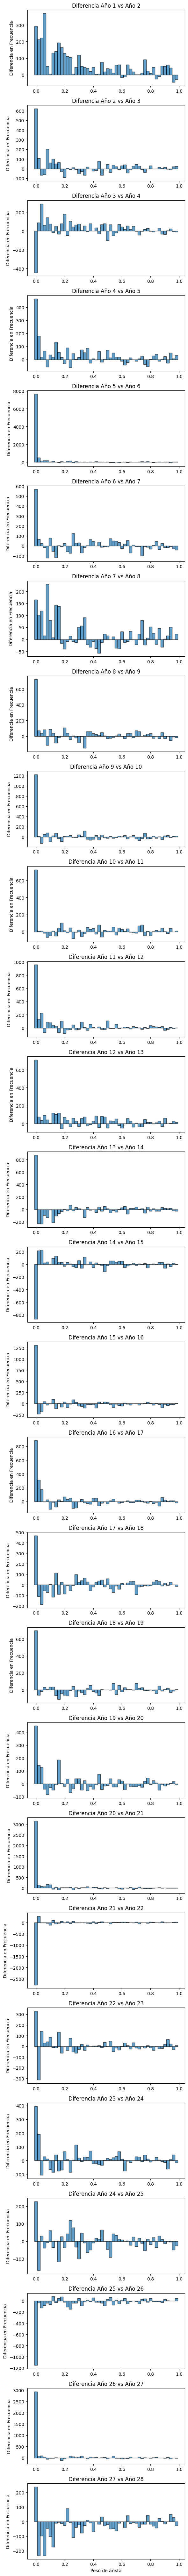

In [11]:
fig, axes = plt.subplots(num_years-1, 1, figsize=(6, 3 * (num_years-1)), sharex=False)

for i in range(num_years-1):
    hist1, bins1 = np.histogram(filtered_to_1_year[i], bins=50, range=(0, 1))
    hist2, bins2 = np.histogram(filtered_to_1_year[i+1], bins=50, range=(0, 1))

    hist_diff = (hist2 - hist1)

    axes[i].bar(bins1[:-1], hist_diff, width=np.diff(bins1), edgecolor='black', alpha=0.7)
    axes[i].set_title(f"Diferencia Año {i+1} vs Año {i+2}")
    axes[i].set_ylabel("Diferencia en Frecuencia")

plt.xlabel("Peso de arista")
plt.tight_layout()
plt.show()


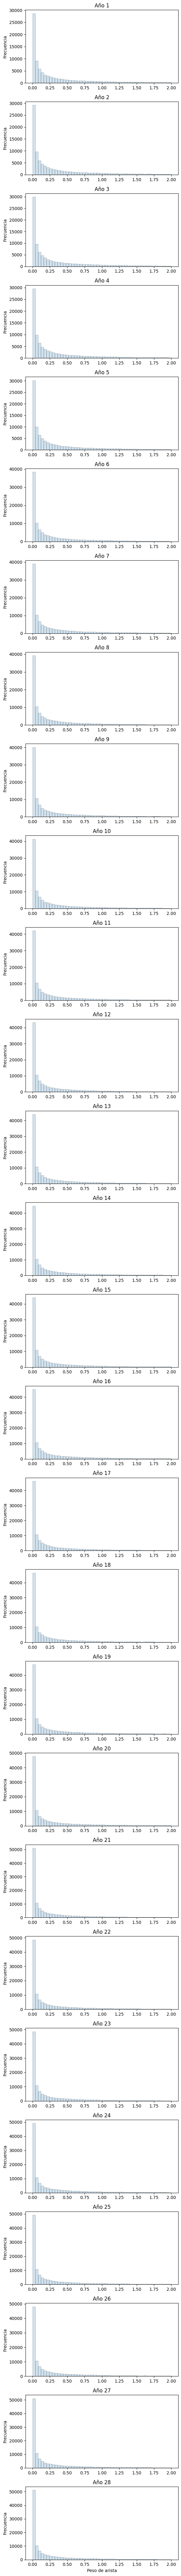

In [12]:
fig, axes = plt.subplots(num_years, 1, figsize=(6, 3 * num_years), sharex=False)

for i in range(num_years):
    axes[i].hist(filtered_year[i], bins=50, edgecolor='black', alpha=0.2)
    axes[i].set_title(f"Año {i+1}")
    axes[i].set_ylabel("Frecuencia")

plt.xlabel("Peso de arista")
plt.tight_layout()
plt.show()


## Escala Log Log

### Filtrando RCA < 2

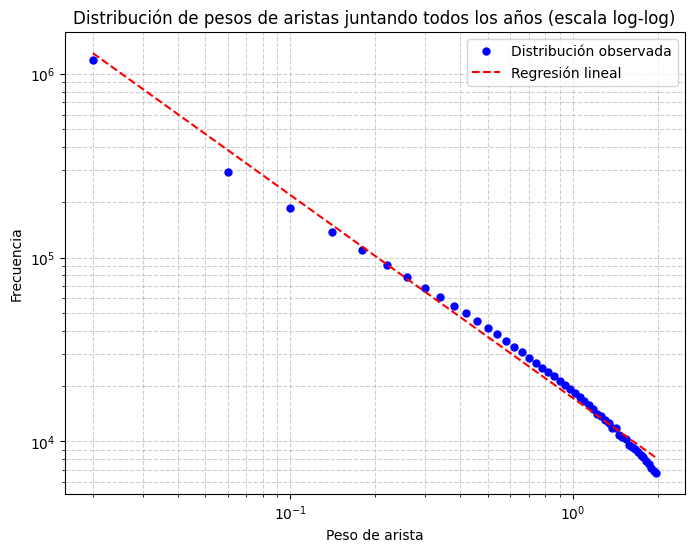

In [29]:
all_weights = np.concatenate(filtered_year)
counts, bins = np.histogram(all_weights, bins=50)
bins_center = 0.5 * (bins[:-1] + bins[1:])

# Filtro valores mayores a cero para evitar log(0)
mask = counts > 0
log_bins = np.log10(bins_center[mask])
log_counts = np.log10(counts[mask])

slope, intercept = np.polyfit(log_bins, log_counts, 1)
regression_line = 10**(intercept) * bins_center**slope

plt.figure(figsize=(8, 6))
plt.loglog(bins_center[mask], counts[mask], 'bo', markersize=5, label="Distribución observada")
plt.loglog(bins_center, regression_line, 'r--', label=f"Regresión lineal")
plt.xlabel("Peso de arista")
plt.ylabel("Frecuencia")
plt.title("Distribución de pesos de aristas juntando todos los años (escala log-log)")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.show()


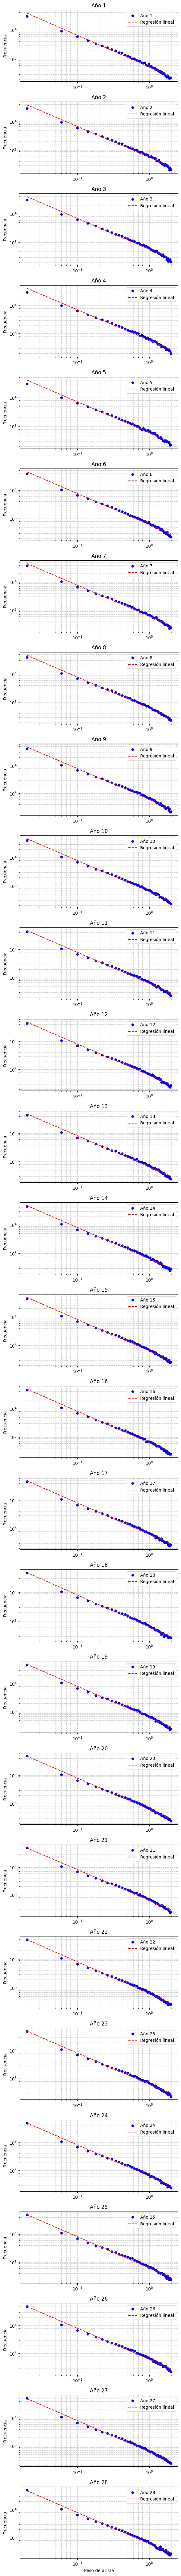

In [ ]:
fig, axes = plt.subplots(num_years, 1, figsize=(6, 3 * num_years), sharex=False)

for i in range(num_years):
    counts, bins = np.histogram(filtered_year[i], bins=50)

    # Filtro valores mayores a cero para evitar log(0)
    mask = (counts > 0)
    bins_center = 0.5 * (bins[:-1] + bins[1:])
    log_bins = np.log10(bins_center[mask])
    log_counts = np.log10(counts[mask])

    slope, intercept = np.polyfit(log_bins, log_counts, 1)
    regression_line = 10**(intercept) * bins_center**slope


    axes[i].loglog(bins_center[mask], counts[mask], 'bo', markersize=5, label=f"Año {i+1}")
    axes[i].loglog(bins_center, regression_line, 'r--', label=f"Regresión lineal")
    axes[i].set_title(f"Año {i+1}")
    axes[i].set_ylabel("Frecuencia")
    axes[i].grid(True, which="both", linestyle="--", alpha=0.6)
    axes[i].legend()

plt.xlabel("Peso de arista")
plt.tight_layout()
plt.show()


### Sin filtrar RCA

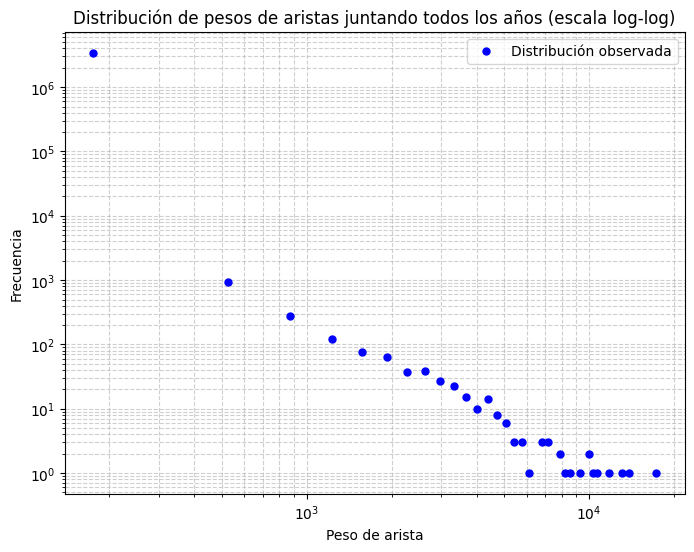

In [18]:
all_weights = np.concatenate(year)
counts, bins = np.histogram(all_weights, bins=50)
bins_center = 0.5 * (bins[:-1] + bins[1:])

# Filtro valores mayores a cero para evitar log(0)
mask = counts > 0

plt.figure(figsize=(8, 6))
plt.loglog(bins_center[mask], counts[mask], 'bo', markersize=5, label="Distribución observada")
plt.xlabel("Peso de arista")
plt.ylabel("Frecuencia")
plt.title("Distribución de pesos de aristas juntando todos los años (escala log-log)")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.show()


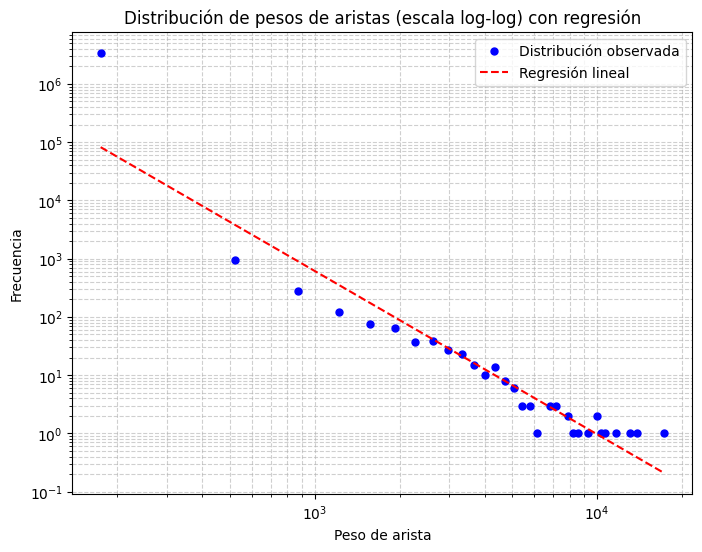

In [ ]:
all_weights = np.concatenate(year)

counts, bins = np.histogram(all_weights, bins=50)
bins_center = 0.5 * (bins[:-1] + bins[1:])

# Filtro valores mayores a cero para evitar log(0)
mask = counts > 0
log_bins = np.log10(bins_center[mask])
log_counts = np.log10(counts[mask])

slope, intercept = np.polyfit(log_bins, log_counts, 1)
regression_line = 10**(intercept) * bins_center**slope

plt.figure(figsize=(8, 6))
plt.loglog(bins_center[mask], counts[mask], 'bo', markersize=5, label="Distribución observada")
plt.loglog(bins_center, regression_line, 'r--', label=f"Regresión lineal")

plt.xlabel("Peso de arista")
plt.ylabel("Frecuencia")
plt.title("Distribución de pesos de aristas (escala log-log) con regresión")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.show()


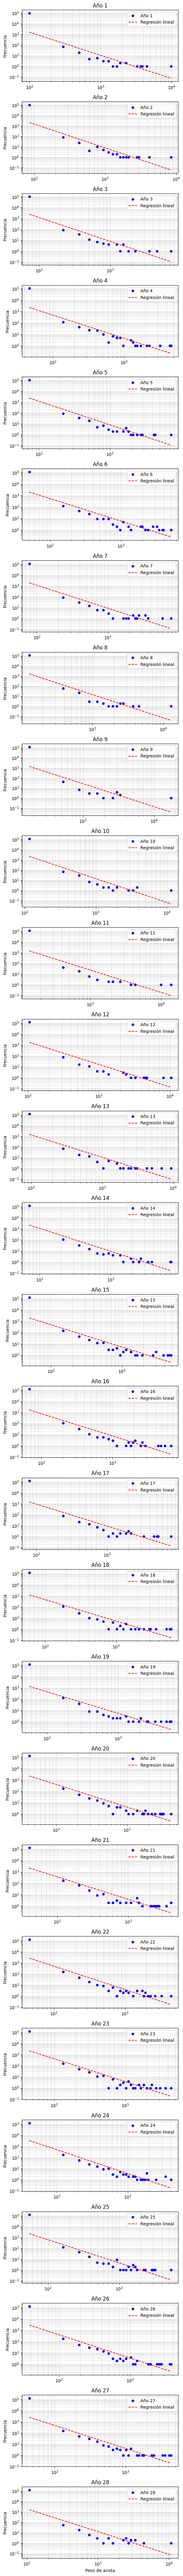

In [4]:
fig, axes = plt.subplots(num_years, 1, figsize=(6, 3 * num_years), sharex=False)

for i in range(num_years):
    counts, bins = np.histogram(year[i], bins=50)

    # Filtro valores mayores a cero para evitar log(0)
    mask = (counts > 0)
    bins_center = 0.5 * (bins[:-1] + bins[1:])
    log_bins = np.log10(bins_center[mask])
    log_counts = np.log10(counts[mask])

    slope, intercept = np.polyfit(log_bins, log_counts, 1)
    regression_line = 10**(intercept) * bins_center**slope


    axes[i].loglog(bins_center[mask], counts[mask], 'bo', markersize=5, label=f"Año {i+1}")
    axes[i].loglog(bins_center, regression_line, 'r--', label=f"Regresión lineal")
    axes[i].set_title(f"Año {i+1}")
    axes[i].set_ylabel("Frecuencia")
    axes[i].grid(True, which="both", linestyle="--", alpha=0.6)
    axes[i].legend()

plt.xlabel("Peso de arista")
plt.tight_layout()
plt.show()



### Clampeando RCA

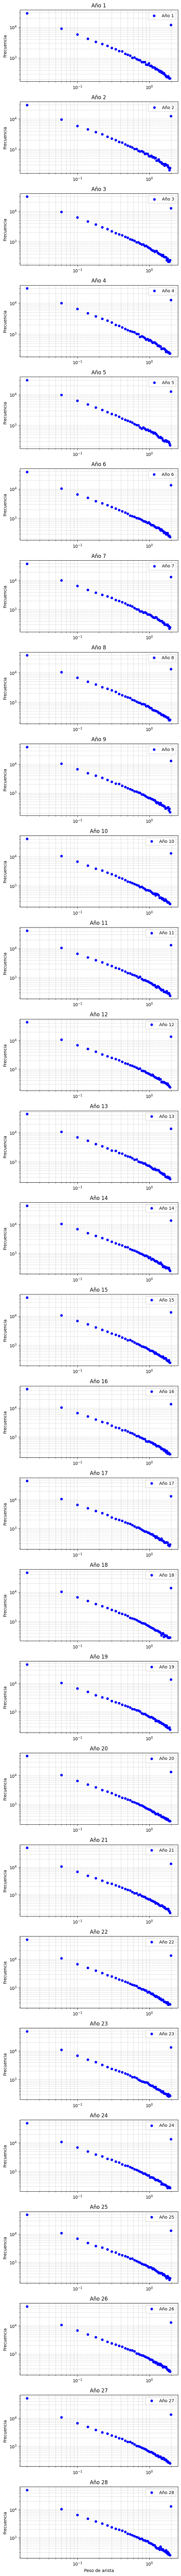

In [17]:
fig, axes = plt.subplots(num_years, 1, figsize=(6, 3 * num_years), sharex=False)

for i in range(num_years):
    counts, bins = np.histogram(clamped_year[i], bins=50)

    # Filtro valores mayores a cero para evitar log(0)
    mask = (counts > 0)
    bins_center = 0.5 * (bins[:-1] + bins[1:])

    axes[i].loglog(bins_center[mask], counts[mask], 'bo', markersize=5, label=f"Año {i+1}")
    axes[i].set_title(f"Año {i+1}")
    axes[i].set_ylabel("Frecuencia")
    axes[i].grid(True, which="both", linestyle="--", alpha=0.6)
    axes[i].legend()

plt.xlabel("Peso de arista")
plt.tight_layout()
plt.show()



# Matriz de adyacencia y seguimientos

Inicialización de matriz de adyacencias

In [5]:
#matrix values
max_u = 136
max_v = 1354
num_v = max_v - max_u  #real quantity of v nodes

adj_matrices = []

for year_data in data:

    adj_matrix = np.zeros((max_u + 1, num_v))

    for u, v, w in year_data:
        v_adj = v - (max_u + 1)  #adjust v index
        adj_matrix[u, v_adj] = min(w,2)  #fill with weights, weight capped at 2.

    adj_matrices.append(adj_matrix)

In [6]:
def graficar_seguimiento_ejes(ejes,listaLabels, title, bbox = (1.28, 1)) :
    lista_de_seguimientos = []

    for pais,producto in ejes:
        seguimiento = []
        for year in range(len(adj_matrices)):
            seguimiento.append(adj_matrices[year][pais][producto])
        lista_de_seguimientos.append(seguimiento)


    plt.figure(figsize=(8, 6))
    for i in range(len(ejes)):
        plt.plot(años, lista_de_seguimientos[i], linestyle = 'dashed', marker='o', label=listaLabels[i])

    plt.xlabel("Año")
    plt.ylabel("Peso")
    plt.legend(loc='upper center', bbox_to_anchor=bbox, ncol=1)
    plt.tight_layout
    plt.title(title)
    plt.show()



In [7]:
## Esta version toma mas años iniciales y no guarda el peso
low_weighted_edges = set()

for year in range(0,3):
    rows = adj_matrices[year]
    for x in range(len(rows)):
        column = rows[x]
        for y in range(len(column)):
            weight = column[y]
            if weight >=0.1 and weight<0.3:
                low_weighted_edges.add((x,y))

print(len(low_weighted_edges))
grown_up_edges_set = set()

for u,v in low_weighted_edges:
    for year in range(5,len(adj_matrices)):
        new_weight = adj_matrices[year][u][v]
        if new_weight >= 1:
            grown_up_edges_set.add((u,v))

print(len(grown_up_edges_set))



33277
11903


In [5]:
print(low_weighted_edges)

{(39, 1043), (133, 678), (55, 987), (127, 863), (16, 1032), (33, 447), (74, 448), (44, 47), (17, 853), (122, 115), (127, 1213), (130, 730), (11, 1038), (85, 987), (71, 1089), (33, 797), (107, 746), (5, 469), (48, 1105), (34, 1207), (63, 447), (119, 756), (66, 1095), (4, 217), (56, 407), (99, 1043), (2, 1110), (29, 1213), (4, 1156), (131, 177), (58, 638), (20, 346), (94, 1049), (116, 808), (57, 1167), (52, 823), (51, 598), (59, 1213), (85, 182), (71, 284), (11, 233), (17, 987), (70, 813), (120, 176), (69, 588), (45, 2), (107, 880), (105, 53), (50, 346), (102, 536), (5, 603), (22, 18), (13, 464), (118, 480), (26, 891), (12, 993), (43, 306), (64, 1183), (29, 408), (84, 115), (115, 182), (120, 526), (80, 1127), (102, 886), (105, 403), (55, 316), (46, 762), (115, 1121), (63, 931), (82, 1173), (114, 896), (57, 362), (116, 942), (133, 357), (19, 1009), (55, 666), (31, 80), (36, 424), (93, 958), (79, 1060), (127, 542), (130, 59), (16, 711), (95, 1004), (126, 317), (107, 75), (21, 1055), (10, 1

In [69]:
print(len(grown_up_edges_set))

3921


In [97]:
print(grown_up_edges_set)

{(132, 39), (133, 678), (17, 732), (127, 863), (33, 676), (71, 968), (83, 39), (29, 971), (127, 45), (119, 864), (124, 979), (127, 1213), (77, 867), (89, 463), (121, 910), (4, 96), (71, 1089), (131, 1103), (24, 977), (5, 469), (127, 166), (63, 447), (68, 754), (44, 168), (71, 271), (45, 1036), (71, 42), (20, 225), (66, 1095), (4, 217), (11, 1159), (66, 866), (82, 810), (99, 225), (31, 993), (105, 979), (96, 1159), (101, 5), (6, 182), (66, 987), (4, 109), (24, 990), (98, 939), (11, 233), (85, 182), (72, 657), (8, 1167), (111, 585), (28, 816), (83, 523), (45, 2), (93, 716), (127, 300), (68, 888), (90, 647), (16, 469), (119, 1119), (131, 190), (43, 306), (115, 182), (120, 526), (82, 5), (105, 403), (50, 467), (96, 583), (82, 1173), (44, 652), (61, 67), (95, 883), (126, 196), (117, 642), (12, 67), (130, 59), (16, 711), (52, 139), (93, 140), (81, 840), (123, 19), (105, 416), (51, 1082), (25, 652), (66, 424), (136, 897), (29, 771), (67, 1063), (50, 830), (93, 1200), (36, 666), (72, 94), (58,

In [ ]:
"""
Tengo que ordenar un poco esto, definir finalmente como voy a hacer todo y ver como lo puedo graficar.
En lo posible eliminar los duplicados.  
Estaria bueno tambien, agarrar dos o tres ejes que empiecen en un valor bajo y hacer el seguimiento año a año de como crecen.

agarrar por ej: (133, 678) ; (17, 732) ; (33, 676)

También estaria bueno ver como trabajar con los porcentajes de ejes que crecen y que no y como ir graficando eso. Quizas un pie chart este bien.
Ver como graficar los porcentajes calculados de precisión (probablemente un piechart este bien ((pero probablmente no tenga sentido hacerlo en matplot))).
"""

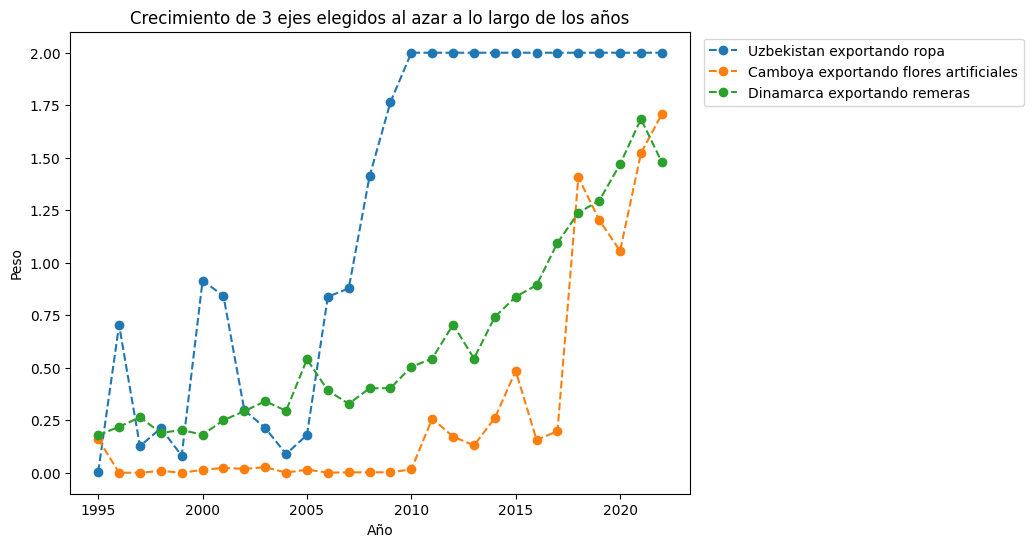

In [39]:
ejes = ([(133, 678), (17, 732), (33, 676)])
labels= ['Uzbekistan exportando ropa','Camboya exportando flores artificiales','Dinamarca exportando remeras']
title = "Crecimiento de 3 ejes elegidos al azar a lo largo de los años"
graficar_seguimiento_ejes(ejes,labels,title)


In [54]:
obtain_product_and_country_from_edge(33,676)
print()
obtain_product_and_country_from_edge(133,678)
print()
obtain_product_and_country_from_edge(17,732)
print()

Pais: Denmark 

6105
2467    Shirts: men's or boys', of cotton, knitted or ...
2468    Shirts: men's or boys', of man-made fibres, kn...
2469    Shirts: men's or boys', of textile materials (...
Name: description, dtype: object

Pais: Uzbekistan 

6107
2473    Underpants and briefs: men's or boys', of cott...
2474    Underpants and briefs: men's or boys', of man-...
2475    Underpants and briefs: men's or boys', of text...
2476    Nightshirts and pyjamas: men's or boys', of co...
2477    Nightshirts and pyjamas: men's or boys', of ma...
2478    Nightshirts and pyjamas: men's or boys', of te...
2479    Bathrobes, dressing gowns and similar articles...
2480    Bathrobes, dressing gowns and similar articles...
2481    Bathrobes, dressing gowns and similar articles...
Name: description, dtype: object

Pais: Cambodia 

6702
2735    Flowers, foliage and fruit, artificial, and pa...
2736    Flowers, foliage and fruit, artificial, and pa...
Name: description, dtype: object



In [7]:
## Esta version toma mas años iniciales y no guarda el peso
high_weighted_edges = set()

for year in range(0,3):
    rows = adj_matrices[year]
    for x in range(len(rows)):
        column = rows[x]
        for y in range(len(column)):
            weight = column[y]
            if weight >=1:
                high_weighted_edges.add((x,y))

print(len(high_weighted_edges))
deflated_edges_set = set()

for u,v in high_weighted_edges:
    for year in range(5,len(adj_matrices)):
        new_weight = adj_matrices[year][u][v]
        if new_weight < 0.5:
            deflated_edges_set.add((u,v))

print(len(deflated_edges_set))



28142
15817


In [8]:
print(deflated_edges_set)

{(132, 268), (82, 676), (51, 343), (44, 155), (56, 1212), (92, 906), (71, 29), (16, 93), (114, 399), (95, 157), (105, 845), (48, 45), (41, 1089), (34, 147), (53, 160), (3, 568), (8, 912), (94, 686), (71, 1197), (90, 1210), (50, 91), (136, 1097), (48, 1213), (122, 1162), (27, 107), (132, 160), (63, 326), (118, 225), (85, 48), (68, 404), (16, 214), (95, 507), (45, 915), (12, 738), (45, 686), (62, 101), (55, 1108), (110, 815), (108, 971), (58, 625), (25, 1202), (92, 209), (111, 222), (66, 974), (116, 566), (28, 453), (66, 745), (88, 504), (79, 684), (98, 697), (115, 866), (82, 689), (63, 447), (6, 1108), (128, 576), (105, 1087), (96, 1038), (8, 1154), (72, 415), (11, 1159), (107, 867), (105, 40), (29, 1213), (110, 118), (5, 590), (8, 107), (25, 276), (63, 568), (11, 112), (119, 1106), (105, 1208), (136, 521), (67, 687), (98, 0), (105, 979), (31, 764), (36, 1108), (108, 1213), (122, 128), (134, 219), (61, 872), (66, 1216), (28, 695), (52, 1052), (83, 402), (93, 595), (22, 126), (63, 689), 

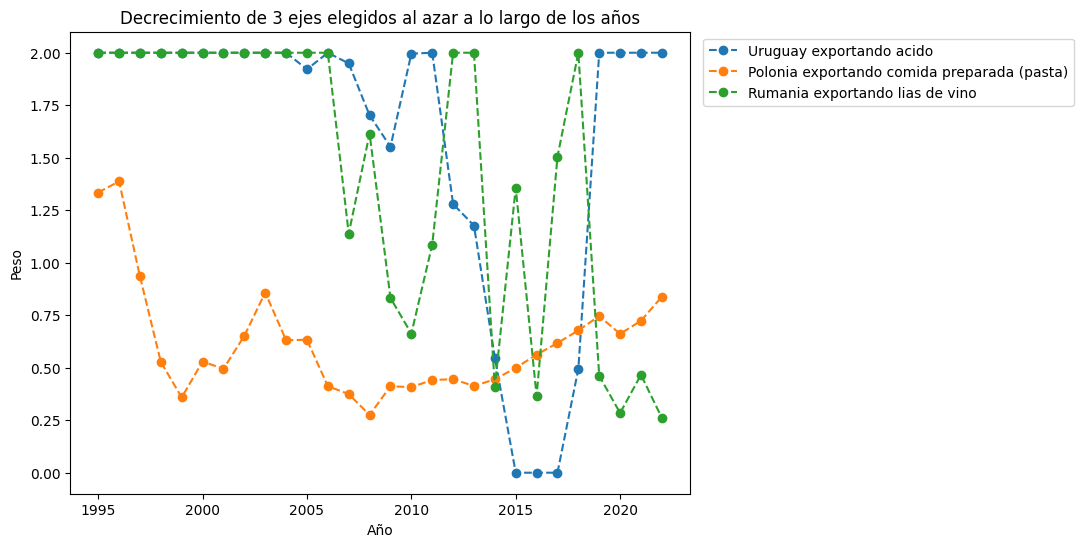

In [37]:
ejes = ([(132, 268), (95, 157), (98, 191)])
labels= ['Uruguay exportando acido','Polonia exportando comida preparada (pasta)','Rumania exportando lias de vino']
title = "Decrecimiento de 3 ejes elegidos al azar a lo largo de los años"
graficar_seguimiento_ejes(ejes,labels,title,(1.32, 1))


In [32]:
list_years_above_1 = []
list_years_below_1 = []

for u,v in low_weighted_edges:
    years_above_1 = 0
    years_below_1 = 0
    for year in range(len(adj_matrices)):
        years_until_grow = 30
        new_weight = adj_matrices[year][u][v]
        if new_weight>=1:
            years_above_1+=1
        else:
            years_below_1+=1
    list_years_above_1.append(years_above_1)
    list_years_below_1.append(years_below_1)

prom_years_above_1 = np.mean(list_years_above_1)
prom_years_below_1 = np.mean(list_years_below_1)

print(prom_years_above_1)
print(prom_years_below_1)

2.4556600655107133
25.544339934489287


In [35]:
num_edges_that_grow = 0
list_years_until_grow = []

for u,v in low_weighted_edges:
    years_until_grow = 0
    it_grew = False
    for year in range(4,len(adj_matrices)):
        new_weight = adj_matrices[year][u][v]
        if new_weight>=1:
            num_edges_that_grow+=1
            list_years_until_grow.append(years_until_grow)
            break
        else:
            years_until_grow+=1

prom = sum(list_years_until_grow)/num_edges_that_grow


print(prom)
print(num_edges_that_grow)
print(len(low_weighted_edges))

7.716937736159028
12174
33277


In [9]:
argentina_grown_edges = [(u,v) for u, v in grown_up_edges_set if u == 4]

argentina_deflated_edges = [(u,v) for u, v in deflated_edges_set if u == 4]

In [10]:
print(argentina_grown_edges)
print(len(argentina_grown_edges))

[(4, 96), (4, 217), (4, 109), (4, 485), (4, 969), (4, 164), (4, 298), (4, 650), (4, 597), (4, 1094), (4, 531), (4, 36), (4, 104), (4, 454), (4, 159), (4, 832), (4, 148), (4, 887), (4, 82), (4, 392), (4, 889), (4, 205), (4, 957), (4, 86), (4, 99), (4, 262), (4, 517), (4, 827), (4, 332), (4, 1058), (4, 829), (4, 132), (4, 279), (4, 750), (4, 26), (4, 376), (4, 444), (4, 136), (4, 743), (4, 756), (4, 1119), (4, 193), (4, 261), (4, 395), (4, 316), (4, 437), (4, 208), (4, 947), (4, 452), (4, 1004), (4, 12), (4, 509), (4, 1114), (4, 1169), (4, 982), (4, 69), (4, 445), (4, 71), (4, 313), (4, 555), (4, 623), (4, 986), (4, 812), (4, 115), (4, 746), (4, 1109), (4, 304), (4, 196), (4, 9), (4, 1098), (4, 427), (4, 790), (4, 361), (4, 253), (4, 53), (4, 363), (4, 981), (4, 473), (4, 233), (4, 354), (4, 180), (4, 114), (4, 1216), (4, 411), (4, 171), (4, 292), (4, 897), (4, 481), (4, 1033), (4, 1209), (4, 162), (4, 417)]
92


In [52]:
print(argentina_deflated_edges)
print(len(argentina_deflated_edges))

[(4, 835), (4, 956), (4, 30), (4, 1037), (4, 232), (4, 650), (4, 892), (4, 100), (4, 355), (4, 1094), (4, 773), (4, 894), (4, 1149), (4, 344), (4, 949), (4, 23), (4, 157), (4, 170), (4, 588), (4, 830), (4, 1019), (4, 590), (4, 390), (4, 511), (4, 403), (4, 766), (4, 350), (4, 592), (4, 834), (4, 768), (4, 205), (4, 97), (4, 944), (4, 286), (4, 757), (4, 341), (4, 20), (4, 959), (4, 330), (4, 814), (4, 143), (4, 398), (4, 950), (4, 871), (4, 92), (4, 563), (4, 576), (4, 255), (4, 510), (4, 523), (4, 578), (4, 15), (4, 954), (4, 499), (4, 191), (4, 809), (4, 259), (4, 501), (4, 314), (4, 690), (4, 140), (4, 503), (4, 558), (4, 813), (4, 439), (4, 560), (4, 802), (4, 144), (4, 494), (4, 1112), (4, 1114), (4, 551), (4, 927), (4, 1), (4, 256), (4, 861), (4, 177), (4, 311), (4, 124), (4, 487), (4, 258), (4, 984), (4, 810), (4, 489), (4, 260), (4, 181), (4, 302), (4, 557), (4, 357), (4, 491), (4, 612), (4, 304), (4, 546), (4, 801), (4, 1164), (4, 935), (4, 372), (4, 172), (4, 306), (4, 1166),

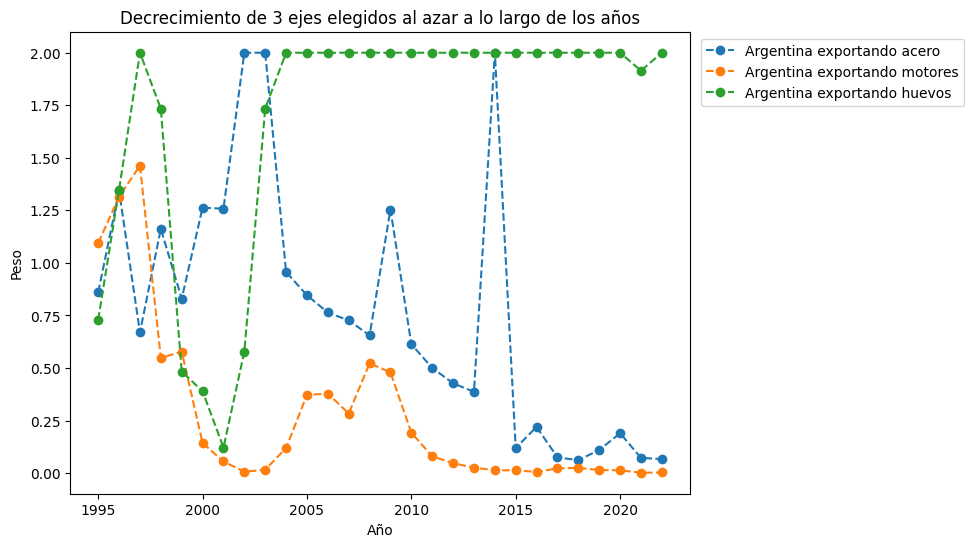

In [34]:
ejes = ([(4, 835), (4, 956), (4, 30)])
labels= ['Argentina exportando acero','Argentina exportando motores','Argentina exportando huevos']
title = "Decrecimiento de 3 ejes elegidos al azar a lo largo de los años"
graficar_seguimiento_ejes(ejes,labels,title,(1.23, 1))

In [10]:
obtain_product_and_country_from_edge(4,30)

Pais: Argentina 

0408
169    Eggs: birds' eggs, yolks, dried, whether or no...
170    Eggs: birds' eggs, yolks, fresh, cooked by ste...
171    Eggs: birds' eggs (not in shell, excluding yol...
172    Eggs: birds' eggs (not in shell, excluding yol...
Name: description, dtype: object


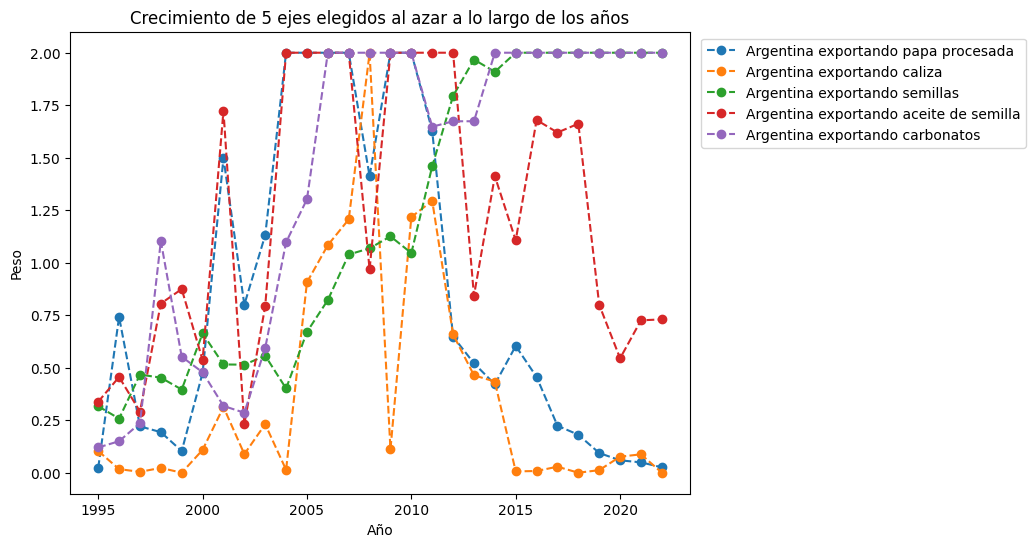

In [32]:
ejes = ([(4, 96), (4, 217), (4, 109), (4, 104),(4,298)])
labels= ['Argentina exportando papa procesada','Argentina exportando caliza','Argentina exportando semillas','Argentina exportando aceite de semilla', 'Argentina exportando carbonatos']
title = "Crecimiento de 5 ejes elegidos al azar a lo largo de los años"
graficar_seguimiento_ejes(ejes,labels,title)

In [ ]:
obtain_product_and_country_from_edge(4,96)
obtain_product_and_country_from_edge(4,217)
obtain_product_and_country_from_edge(4,109)



Pais: Argentina 

1105
367    Flour and meal: of potatoes
368            Flakes: of potatoes
Name: description, dtype: object
Pais: Argentina 

2521
710    Limestone flux: limestone and other calcareous...
Name: description, dtype: object
Pais: Argentina 

1209
398     Seed: sugar beet seed, of a kind used for sowing
399    Seed: lucerne (alfalfa) seed, of a kind used f...
400    Seed: clover (trifolium spp.) seed, of a kind ...
401              Seed: fescue, of a kind used for sowing
402    Seed: kentucky blue grass (poa pratensis l.) s...
403    Seed: rye grass (lolium multiflorum lam., loli...
404    Seed: of forage plants, other than beet seed, ...
405    Seed: of herbaceous plants cultivated principa...
406      Seed: vegetable seed, of a kind used for sowing
407    Seed: n.e.s. in heading no. 1209, of a kind us...
Name: description, dtype: object
Pais: Argentina 

4105
1696    Leather: of sheep or lamb, without wool on, ta...
1697    Leather: of sheep or lamb, without wool on, pa

In [72]:
obtain_product_and_country_from_edge(4,104)
obtain_product_and_country_from_edge(4,298)

Pais: Argentina 

1204
385    Oil seeds: linseed, whether or not broken
Name: description, dtype: object
Pais: Argentina 

2836
923                       Carbonates: disodium carbonate
924    Carbonates: sodium hydrogencarbonate (sodium b...
925                      Carbonates: potassium carbonate
926                        Carbonates: calcium carbonate
927                         Carbonates: barium carbonate
928                        Carbonates: lithium carbonate
929                      Carbonates: strontium carbonate
930               Carbonates: n.e.s. in heading no. 2836
Name: description, dtype: object


In [13]:
#Buscar los que empiezan bajos y se mantienen en al menos 1 a lo largo de todos los años
#Luego ir graficando de a 5 ejes por grafico (quizas mejor 3 graficos de 4 ejes y uno de 5)

low_weighted_edges = set()

for year in range(0,3):
    rows = adj_matrices[year]
    for x in range(len(rows)):
        column = rows[x]
        for y in range(len(column)):
            weight = column[y]
            if weight >=0.1 and weight<0.3:
                low_weighted_edges.add((x,y))

print(len(low_weighted_edges))
grown_and_stable_edges = []

for u,v in low_weighted_edges:
    subio = False
    bajo = False
    for year in range(3,len(adj_matrices)): #Si cambio el 3 por un 5 se pueden ver algunos resultados interesantes
        new_weight = adj_matrices[year][u][v]
        if new_weight >= 1:
            subio = True
        elif subio:
            bajo = True
            break
    if subio and not bajo:
        grown_and_stable_edges.append((u,v))

print(len(grown_and_stable_edges))



33277
1634


In [14]:
argentina_stable_edges = [(u,v) for u, v in grown_and_stable_edges if u == 4]

print(len(argentina_stable_edges))
print(argentina_stable_edges)

14
[(4, 164), (4, 26), (4, 136), (4, 437), (4, 292), (4, 109), (4, 12), (4, 114), (4, 171), (4, 1058), (4, 395), (4, 208), (4, 509), (4, 363)]


In [ ]:
print(argentina_stable_edges[:5])

[(4, 164), (4, 298), (4, 26), (4, 136)]


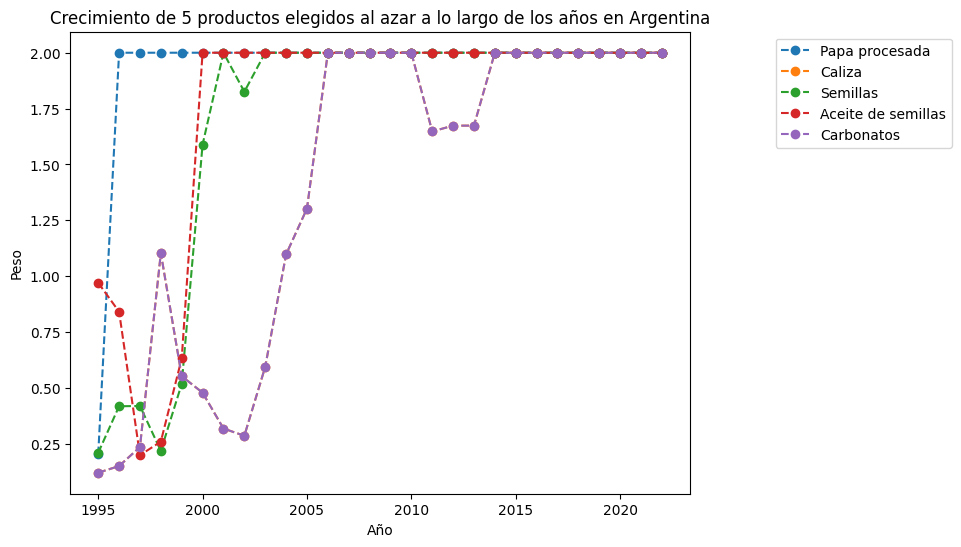

In [15]:
#Este no cumple con que se mantengan en mas de 1 todos los años pero me lo guardo porque me resulta interesante
ejes = [(4, 164), (4, 298), (4, 26), (4, 136),(4,298)]
labels= ['Papa procesada','Caliza','Semillas','Aceite de semillas', 'Carbonatos']
title = "Crecimiento de 5 productos elegidos al azar a lo largo de los años en Argentina"
graficar_seguimiento_ejes(ejes,labels,title)

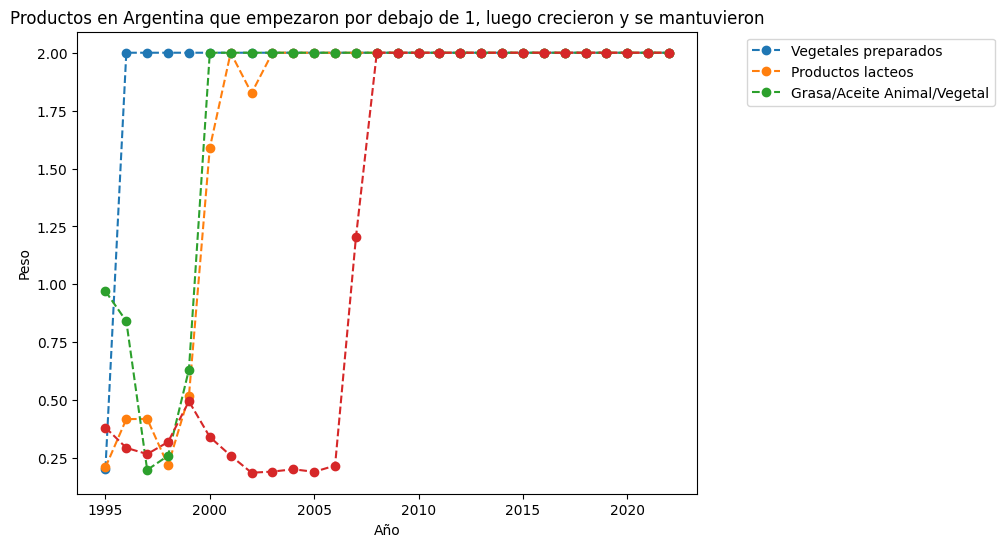

'\nel grupo del ultimo es:\n\n1627,"Binders, prepared: for foundry moulds or cores",382310\n1628,"Metal carbides: non-agglomerated, mixed together or with metallic binders",382330\n1629,"Cements, mortars or concretes: their prepared additives",382340\n1630,Mortars and concretes: non-refractory,382350\n1631,Sorbitol: other than that of item no. 2905.44,382360\n1632,"Chemical products, preparations and residual products of chemical or allied industries n.e.s. or included in heading no. 3823",382390\n\n'

In [16]:
#[(4, 164), (4, 26), (4, 136), (4, 437), (4, 292), (4, 109), (4, 12), (4, 114), (4, 171), (4, 1058), (4, 395), (4, 208), (4, 509), (4, 363)]
ejes = [(4, 164), (4, 26), (4, 136), (4, 437)]
title= "Productos en Argentina que empezaron por debajo de 1, luego crecieron y se mantuvieron"
graficar_seguimiento_ejes(ejes,["Vegetales preparados","Productos lacteos","Grasa/Aceite Animal/Vegetal",""],title)


"""
el grupo del ultimo es:

1627,"Binders, prepared: for foundry moulds or cores",382310
1628,"Metal carbides: non-agglomerated, mixed together or with metallic binders",382330
1629,"Cements, mortars or concretes: their prepared additives",382340
1630,Mortars and concretes: non-refractory,382350
1631,Sorbitol: other than that of item no. 2905.44,382360
1632,"Chemical products, preparations and residual products of chemical or allied industries n.e.s. or included in heading no. 3823",382390

"""

In [67]:
for u,v in ejes:
    obtain_product_and_country_from_edge(u,v)


Pais: Argentina 

2004
560    Vegetable preparations: potatoes, prepared or ...
561    Vegetable preparations: vegetables and mixture...
Name: description, dtype: object
Pais: Argentina 

0404
160    Dairy produce: whey, whether or not concentrat...
161    Dairy produce: natural milk constituents (excl...
Name: description, dtype: object
Pais: Argentina 

1518
475    Animal or vegetable fats and oils and their fr...
Name: description, dtype: object
Pais: Argentina 

3823
1490       Binders, prepared: for foundry moulds or cores
1491    Metal carbides: non-agglomerated, mixed togeth...
1492    Cements, mortars or concretes: their prepared ...
1493                Mortars and concretes: non-refractory
1494        Sorbitol: other than that of item no. 2905.44
1495    Chemical products, preparations and residual p...
Name: description, dtype: object


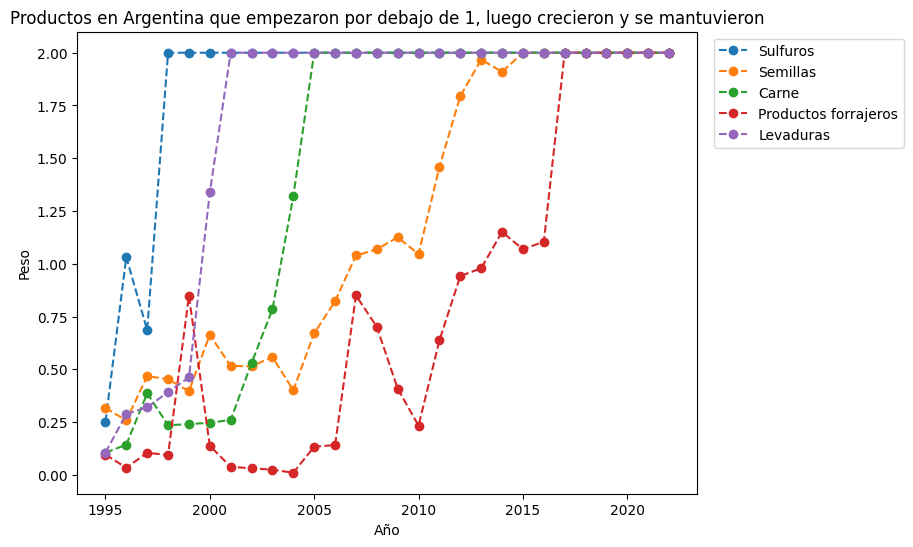

In [17]:
#[(4, 164), (4, 26), (4, 136), (4, 437), (4, 292), (4, 109), (4, 12), (4, 114), (4, 171), (4, 1058), (4, 395), (4, 208), (4, 509), (4, 363)]
ejes = [(4, 292), (4, 109), (4, 12), (4, 114),(4,171)]
title= "Productos en Argentina que empezaron por debajo de 1, luego crecieron y se mantuvieron"
graficar_seguimiento_ejes(ejes,["Sulfuros","Semillas","Carne","Productos forrajeros","Levaduras"],title,(1.18,1))

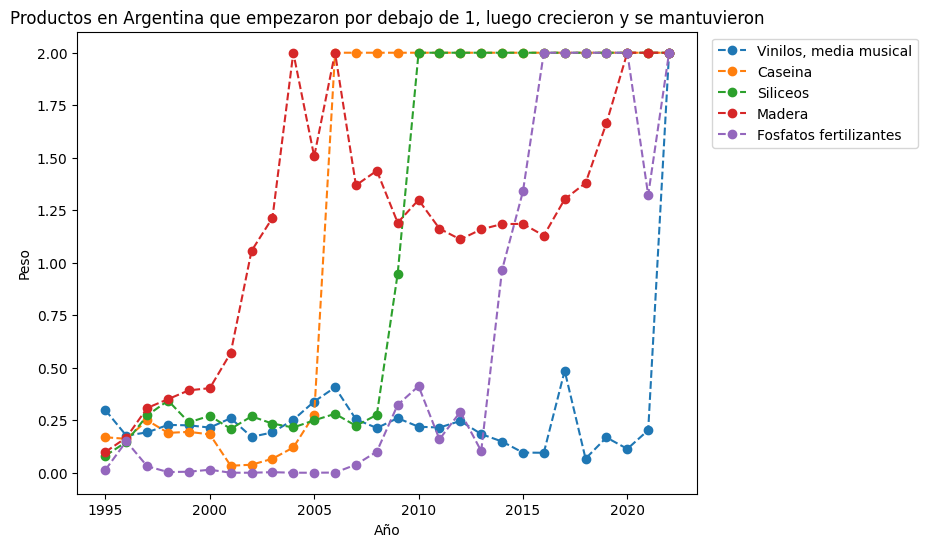

In [18]:
#[(4, 1058), (4, 395), (4, 208), (4, 509), (4, 363)]
ejes = [(4, 1058), (4, 395), (4, 208), (4, 509), (4, 363)]
title= "Productos en Argentina que empezaron por debajo de 1, luego crecieron y se mantuvieron"
graficar_seguimiento_ejes(ejes,["Vinilos, media musical","Caseina","Siliceos","Madera","Fosfatos fertilizantes"],title,(1.19,1))

In [96]:
def edges_historically_weighted_more_than_1():
    historical_1s = set()

    rows = adj_matrices[0]
    for u in range(len(rows)):
        columns = rows[u]
        for v in range(len(columns)):
            bajo = False
            for year in range(0,28): #Si cambio el 3 por un 5 se pueden ver algunos resultados interesantes
                new_weight = adj_matrices[year][u][v]
                if new_weight < 1:
                    bajo = True
                    break
            if not bajo:
                historical_1s.add((u,v))
    return historical_1s

print(len(edges_historically_weighted_more_than_1()))

7137


In [98]:
argentina_historical_1s = [(u,v) for u, v in edges_historically_weighted_more_than_1() if u == 4]
print(argentina_historical_1s)
print(len(argentina_historical_1s))

[(4, 419), (4, 98), (4, 397), (4, 168), (4, 89), (4, 102), (4, 223), (4, 91), (4, 885), (4, 106), (4, 577), (4, 40), (4, 95), (4, 579), (4, 84), (4, 18), (4, 31), (4, 275), (4, 396), (4, 75), (4, 88), (4, 22), (4, 90), (4, 11), (4, 24), (4, 204), (4, 272), (4, 72), (4, 6), (4, 127), (4, 19), (4, 142), (4, 881), (4, 76), (4, 10), (4, 65), (4, 186), (4, 575), (4, 133), (4, 67), (4, 188), (4, 135), (4, 498), (4, 190), (4, 366), (4, 137), (4, 58), (4, 179), (4, 192), (4, 126), (4, 381), (4, 502), (4, 194), (4, 7), (4, 130), (4, 64), (4, 185), (4, 484), (4, 189), (4, 741), (4, 165), (4, 420), (4, 125), (4, 367), (4, 167), (4, 301), (4, 422), (4, 101), (4, 1095), (4, 48), (4, 169), (4, 94), (4, 833)]
73


In [99]:
for u,v in argentina_historical_1s:
    obtain_product_and_country_from_edge(u,v)


Pais: Argentina 

3805
1451    Terpenic oils: gum, wood or sulphate turpentin...
1452    Terpenic oils: produced by the treatment of co...
Name: description, dtype: object
Pais: Argentina 

1107
372    Malt: not roasted
373        Malt: roasted
Name: description, dtype: object
Pais: Argentina 

3503
1395    Gelatin (including gelatin in rectangular shee...
Name: description, dtype: object
Pais: Argentina 

2008
575    Nuts: ground-nuts, whether or not containing a...
576    Nuts and other seeds: whether or not containin...
577    Fruit: pineapples, prepared or preserved in wa...
578    Fruit: citrus, prepared or preserved in ways n...
579    Fruit: pears, prepared or preserved in ways n....
580    Fruit: apricots, prepared or preserved in ways...
581    Fruit: cherries, prepared or preserved in ways...
582    Fruit: peaches, prepared or preserved in ways ...
583    Fruit: strawberries, prepared or preserved in ...
584    Palm hearts: prepared or preserved, whether or...
585    Fruit: m

In [35]:
def edges_historically_mid_weighted():
    historical_edges = set()

    rows = adj_matrices[0]
    for u in range(len(rows)):
        columns = rows[u]
        for v in range(len(columns)):
            cambio = False
            for year in range(0,28): 
                new_weight = adj_matrices[year][u][v]
                if not (new_weight > 0.3 and new_weight < 0.6):
                    cambio = True
                    break
            if not cambio:
                historical_edges.add((u,v))
    return historical_edges

print(len(edges_historically_mid_weighted()))

80


In [36]:
argentina_historical_midweighted = [(u,v) for u, v in edges_historically_mid_weighted() if u == 4]
print(argentina_historical_midweighted)
print(len(argentina_historical_midweighted))

[]
0


In [38]:
historical_mw = edges_historically_mid_weighted()
print(historical_mw)
for u,v in historical_mw:
    obtain_product_and_country_from_edge(u,v)


{(43, 1068), (57, 640), (106, 157), (19, 1031), (40, 169), (59, 640), (130, 773), (64, 974), (59, 258), (119, 400), (51, 201), (40, 1028), (83, 1182), (128, 439), (43, 1191), (111, 679), (39, 940), (19, 425), (19, 443), (57, 1147), (24, 149), (105, 1016), (116, 479), (83, 967), (128, 1026), (128, 544), (59, 109), (40, 678), (43, 640), (128, 1047), (43, 850), (5, 384), (43, 1124), (64, 390), (64, 454), (40, 707), (83, 1099), (6, 369), (50, 458), (6, 689), (57, 371), (24, 386), (43, 45), (57, 44), (111, 317), (59, 554), (19, 1146), (43, 1076), (40, 1196), (130, 1044), (130, 934), (19, 99), (115, 1171), (43, 221), (105, 654), (83, 1078), (43, 721), (130, 518), (83, 833), (83, 479), (40, 944), (40, 1200), (111, 943), (83, 1201), (43, 362), (6, 1200), (33, 1099), (19, 990), (57, 327), (43, 700), (59, 599), (83, 1011), (123, 928), (57, 519), (33, 653), (40, 512), (40, 521), (59, 928), (55, 457), (83, 940)}
Pais: Germany 

8534
4105    Circuits: printed
Name: description, dtype: object
Pais: 

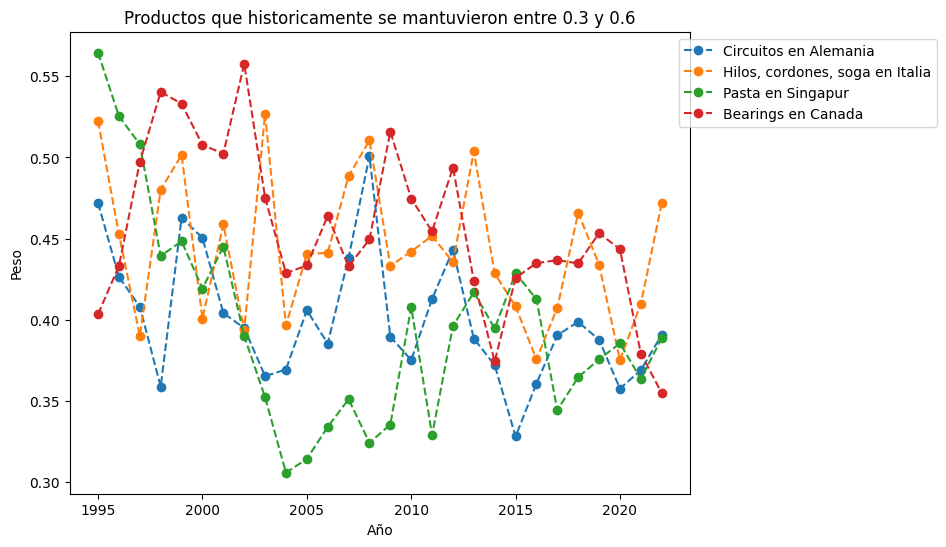

In [42]:
#(4, 1022), (4, 648), (4, 1079), (4, 274)
ejes = [(43, 1068), (57, 640), (106, 157), (19, 1031)]
title= "Productos que historicamente se mantuvieron entre 0.3 y 0.6"
graficar_seguimiento_ejes(ejes,["Circuitos en Alemania", "Hilos, cordones, soga en Italia","Pasta en Singapur","Bearings en Canada"],title,(1.19,1))

In [40]:
for u, v in [(43, 1068), (57, 640), (106, 157), (19, 1031)]:
    obtain_product_and_country_from_edge(u,v)


Pais: Germany 

8534
4105    Circuits: printed
Name: description, dtype: object
Pais: Italy 

5607
2315    Twine: binder or baler twine, of sisal or othe...
2316    Twine, cordage, ropes, cables: of sisal or oth...
2317    Twine: binder or baler twine, of polyethylene ...
2318    Twine, cordage, ropes, cables: of polyethylene...
2319    Twine, cordage, ropes, cables: of synthetic fi...
2320    Twine, cordage, ropes, cables: of materials n....
Name: description, dtype: object
Pais: Singapore 

1902
541    Food preparations: pasta, containing eggs, unc...
542    Food preparations: pasta, uncooked (excluding ...
543    Food preparations: pasta, stuffed (with meat o...
544    Food preparations: pasta (excluding stuffed), ...
545                          Food preparations: couscous
Name: description, dtype: object
Pais: Canada 

8482
3918                                        Ball bearings
3919    Bearings: tapered roller bearings, including c...
3920                  Bearings: spherical r

In [8]:
def edges_historically_high_but_lesser_than_1():
    historical_edges = set()

    rows = adj_matrices[0]
    for u in range(len(rows)):
        columns = rows[u]
        for v in range(len(columns)):
            cambio = False
            for year in range(0,28): 
                new_weight = adj_matrices[year][u][v]
                if not (new_weight > 0.6 and new_weight < 1):
                    cambio = True
                    break
            if not cambio:
                historical_edges.add((u,v))
    return historical_edges

print(len(edges_historically_high_but_lesser_than_1()))

57


In [45]:
argentina_historical_highweighted = [(u,v) for u, v in edges_historically_high_but_lesser_than_1() if u == 4]
print(argentina_historical_highweighted)
print(len(argentina_historical_highweighted))

[]
0


In [47]:
historical_hw = edges_historically_high_but_lesser_than_1()
print(historical_hw)
for u,v in historical_hw:
    obtain_product_and_country_from_edge(u,v)


{(43, 690), (6, 381), (40, 682), (83, 836), (19, 1071), (40, 926), (43, 168), (40, 508), (43, 775), (40, 157), (130, 972), (130, 551), (83, 1095), (43, 967), (111, 461), (59, 936), (130, 987), (57, 380), (128, 849), (40, 852), (111, 958), (6, 444), (115, 388), (130, 474), (111, 1107), (130, 544), (43, 841), (130, 1206), (130, 1035), (111, 463), (130, 440), (33, 739), (111, 1070), (111, 289), (40, 973), (40, 552), (57, 443), (115, 1030), (43, 169), (43, 1182), (57, 1001), (83, 474), (43, 172), (130, 473), (83, 968), (40, 457), (43, 474), (43, 1078), (31, 457), (115, 896), (19, 855), (43, 553), (130, 1031), (128, 1070), (111, 1069), (57, 256), (57, 439)}
Pais: Germany 

6202
2538    Coats: women's or girls', overcoats, raincoats...
2539    Coats: women's or girls', overcoats, raincoats...
2540    Coats: women's or girls', overcoats, raincoats...
2541    Coats: women's or girls', overcoats, raincoats...
2542    Anoraks (including ski-jackets), wind-cheaters...
2543    Anoraks (including s

In [ ]:
def weight_ranges_analysis(ranges):
    #ranges = [(0, 0.05), (0.05, 0.1), (0.1, 0.3), (0.3, 0.6), (0.6, 1), (1, 1.5), (1.5, 2)]
    edges_in_range = []
    mean_yearly_edges_in_range = []

    for lower, upper in ranges:
        yearly_edges_in_range = np.zeros(28)
        historical_edges = set()

        for u in range(len(adj_matrices[0])):
            for v in range(len(adj_matrices[0][u])):
                siempre_en_rango = True
                for year in range(28):
                    weight = adj_matrices[year][u][v]
                    if lower <= weight < upper:
                        yearly_edges_in_range[year] += 1
                    else:
                        siempre_en_rango = False
                if siempre_en_rango:
                    historical_edges.add((u, v))

        edges_in_range.append(len(historical_edges))
        mean_yearly_edges_in_range.append(np.mean(yearly_edges_in_range))

    print(edges_in_range)
    print(mean_yearly_edges_in_range)

    return edges_in_range, mean_yearly_edges_in_range


In [41]:
ranges = [(0, 0.05), (0.05, 0.1), (0.1, 0.3), (0.3, 0.6), (0.6, 1), (1, 1.5), (1.5, 2)]
edges_in_range, mean_yearly_edges_in_range = weight_ranges_analysis(ranges)


[28800, 0, 115, 80, 57, 35, 4]
[np.float64(91890.89285714286), np.float64(10842.035714285714), np.float64(19278.571428571428), np.float64(12799.964285714286), np.float64(8947.107142857143), np.float64(6287.642857142857), np.float64(3754.25)]


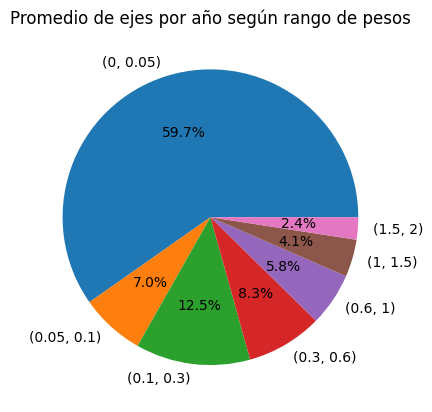

In [42]:
labels = ranges
sizes = mean_yearly_edges_in_range

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
_ = plt.title('Promedio de ejes por año según rango de pesos')


In [43]:
##Este es el numero de ejes que se mantuvieron historicamente en cada rango
#Los ejes entre 0 y 0.1 son tantos que hacen que sea ingraficable   
print(edges_in_range)

[28800, 0, 115, 80, 57, 35, 4]


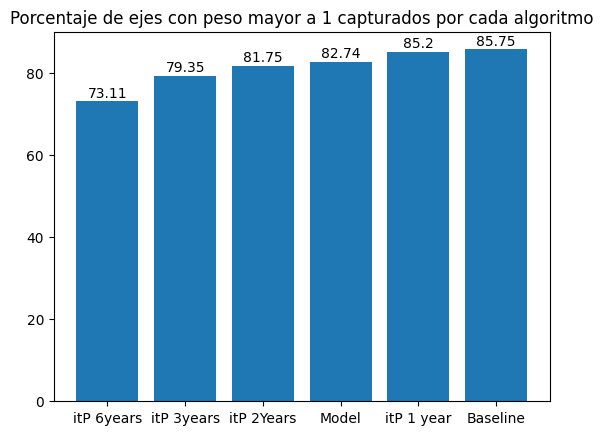

In [37]:
iterative_prediction_results = [73.11, 79.35, 81.75, 82.74, 85.2, 85.75 ]
x = ['itP 6years', 'itP 3years', 'itP 2Years', 'Model' , 'itP 1 year', 'Baseline']
bars = plt.bar(x,iterative_prediction_results)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.3,  
             f'{height}', ha='center', va='bottom')           
plt.title('Porcentaje de ejes con peso mayor a 1 capturados por cada algoritmo')
plt.show()


In [44]:
def determine_bucket(weight):
    #ranges = [(0, 0.05), (0.05, 0.1), (0.1, 0.3), (0.3, 0.6), (0.6, 1), (1, 1.5), (1.5, 2)]
    if 0 <= weight < 0.05: return 0
    if 0.05 <= weight < 0.1: return 1
    if 0.1 <= weight < 0.3: return 2
    if 0.3 <= weight < 0.6: return 3
    if 0.6 <= weight < 1: return 4
    if 1 <= weight < 1.5: return 5
    if 1.5 <= weight < 2: return 6




In [57]:
def range_change_analysis(lower, upper, year_change=1):
    ranges = [(0, 0.05), (0.05, 0.1), (0.1, 0.3), (0.3, 0.6), (0.6, 1), (1, 1.5), (1.5, 2)]
    next_jump_array = np.zeros(len(ranges))

    for year in range(28-year_change):
        for u in range(len(adj_matrices[0])):
            for v in range(len(adj_matrices[0][u])):
                weight = adj_matrices[year][u][v]
                if lower < weight < upper:
                    next_weight = adj_matrices[year+year_change][u][v]
                    bucket = determine_bucket(next_weight)
                    next_jump_array[bucket]+=1
                else: break
    
    return next_jump_array



In [50]:
saltos = range_change_analysis(0, 0.05)

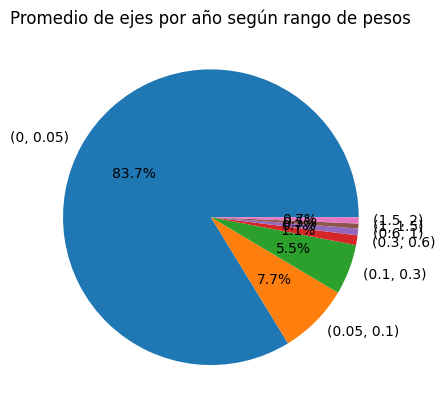

In [51]:
labels = [(0, 0.05), (0.05, 0.1), (0.1, 0.3), (0.3, 0.6), (0.6, 1), (1, 1.5), (1.5, 2)]
sizes = saltos

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
_ = plt.title('Promedio de ejes por año según rango de pesos')


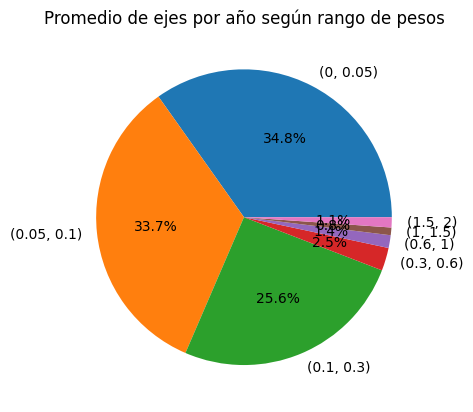

In [52]:
saltos = range_change_analysis(0.05, 0.1)

labels = [(0, 0.05), (0.05, 0.1), (0.1, 0.3), (0.3, 0.6), (0.6, 1), (1, 1.5), (1.5, 2)]
sizes = saltos

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
_ = plt.title('Promedio de ejes por año según rango de pesos')


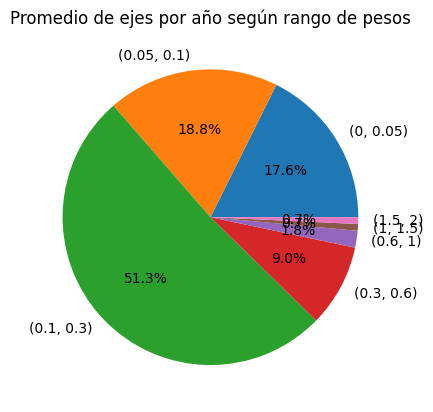

In [53]:
saltos = range_change_analysis(0.1, 0.3)

labels = [(0, 0.05), (0.05, 0.1), (0.1, 0.3), (0.3, 0.6), (0.6, 1), (1, 1.5), (1.5, 2)]
sizes = saltos

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
_ = plt.title('Promedio de ejes por año según rango de pesos')


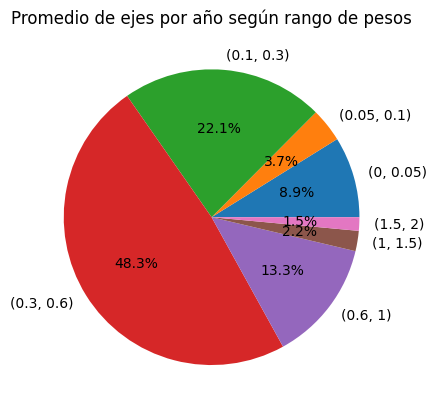

In [58]:
saltos = range_change_analysis(0.3, 0.6)

labels = [(0, 0.05), (0.05, 0.1), (0.1, 0.3), (0.3, 0.6), (0.6, 1), (1, 1.5), (1.5, 2)]
sizes = saltos

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
_ = plt.title('Promedio de ejes por año según rango de pesos')


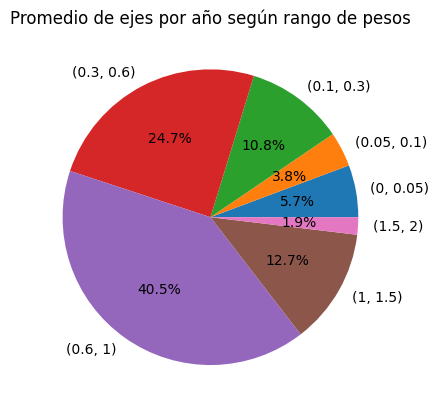

In [55]:
saltos = range_change_analysis(0.6, 1)

labels = [(0, 0.05), (0.05, 0.1), (0.1, 0.3), (0.3, 0.6), (0.6, 1), (1, 1.5), (1.5, 2)]
sizes = saltos

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
_ = plt.title('Promedio de ejes por año según rango de pesos')


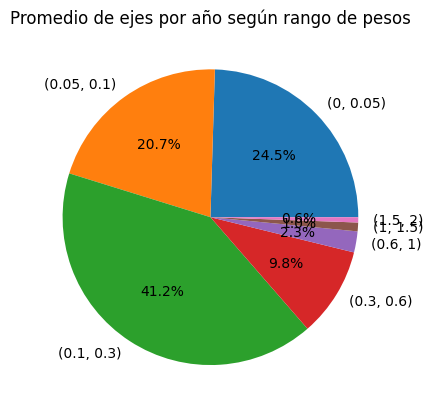

In [61]:
saltos = range_change_analysis(0.1, 0.3,3)

labels = [(0, 0.05), (0.05, 0.1), (0.1, 0.3), (0.3, 0.6), (0.6, 1), (1, 1.5), (1.5, 2)]
sizes = saltos

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
_ = plt.title('Promedio de ejes por año según rango de pesos')

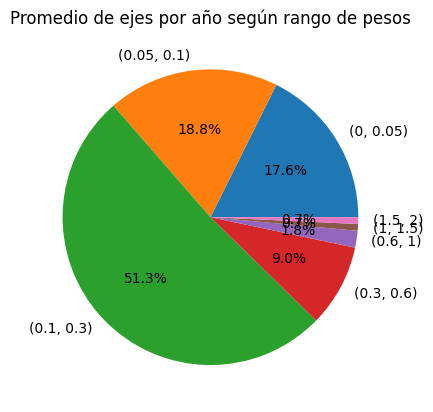

In [60]:
saltos = range_change_analysis(0.1, 0.3)

labels = [(0, 0.05), (0.05, 0.1), (0.1, 0.3), (0.3, 0.6), (0.6, 1), (1, 1.5), (1.5, 2)]
sizes = saltos

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
_ = plt.title('Promedio de ejes por año según rango de pesos')